<a href="https://colab.research.google.com/github/Titan1114/TextureDetection/blob/main/TextureDetectionUsingOpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# importing libraries
import cv2
import numpy as np
import os
from skimage.feature import hog
from skimage import exposure

from google.colab.patches import cv2_imshow
from scipy.spatial.distance import correlation
from scipy.special import logsumexp
%matplotlib inline

In [21]:
# taking original image name with extension
name=input("please enter the name of original fabric image along with extension")
IMAGE_PATH = "Input_images"
IMAGE_PATH =os.path.join(IMAGE_PATH,name)

please enter the name of original fabric image along with extensiontexture1.jpg


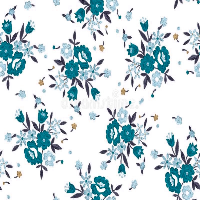

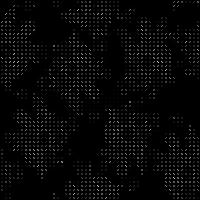

In [37]:
original_fabric=cv2.imread(IMAGE_PATH)
original_fabric = cv2.resize(original_fabric,(200,200),3)
height,width,color=original_fabric.shape

_,design_pattern=hog(original_fabric,orientations=50,pixels_per_cell=(4,4),cells_per_block=(3,3),visualize=True,multichannel=True)

cv2_imshow(original_fabric)
cv2_imshow(design_pattern)


In [42]:
# taking test image name with extension
name=input("please enter the name of test fabric image along with extension")
IMAGE_PATH = "Input_images"
IMAGE_PATH =os.path.join(IMAGE_PATH,name)

please enter the name of test fabric image along with extensiontexture2.jpg


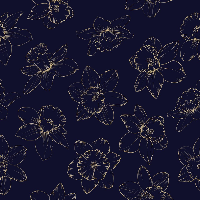

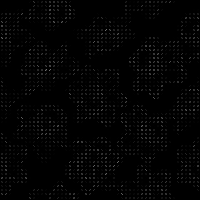

In [43]:
test_fabric=cv2.imread(IMAGE_PATH)
test_fabric = cv2.resize(test_fabric,(200,200),3)

height,width,color=test_fabric.shape

_,test_pattern=hog(test_fabric,orientations=50,pixels_per_cell=(4,4),cells_per_block=(3,3),visualize=True,multichannel=True)

cv2_imshow(test_fabric)
cv2_imshow(test_pattern)


In [44]:
# Normalising the image into one dimensional array
design_pattern=exposure.rescale_intensity(design_pattern,in_range=(0,10))
test_pattern=exposure.rescale_intensity(test_pattern,in_range=(0,10))
original_pattern=design_pattern.flatten()
testing_pattern=test_pattern.flatten()

In [45]:
# using correlation to compare the normalised images
# if the resulting number is lesser then 0.4 then the patterns are quite similar else different
if correlation(testing_pattern,original_pattern)<0.4:
  print("Similar Texture")
else:
  print("Different Texture")
print(correlation(testing_pattern,original_pattern))

Different Texture
0.4452724486584646
